<a href="https://colab.research.google.com/github/dafnep4/Dafne-Petrelli-s-coding/blob/main/final_london_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing all of the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
from scipy.stats import ttest_ind

b)iii) Write the code that uses the downloaded file to create a rectangular dataset where each row represent the hourly averaged measurement of each pollutant and columns are: the date+time of the measurements (first column),the measured value for each of the pollutants considered (one column per pollutant).

In [ ]:
df=pd.read_csv("/content/London.csv", parse_dates=["ReadingDateTime"],dayfirst=True) #read the dowloaded file
new_df=df.pivot_table(index="ReadingDateTime",columns="Species",values="Value",aggfunc="mean") #reshaped the table, so main-heading would correspond to the pollutants "species"
new_df.reset_index(inplace=True)

new_df.to_csv("/content/London_new.csv",index=False) #saved the new file

new_df.head() #diplayed the new main-headings

Species,ReadingDateTime,NO,NO2,NOX,PM1,PM10
0,2022-01-18 13:00:00,6.7,31.1,41.5,NaN,NaN
1,2022-01-18 14:00:00,4.3,26.5,33.1,NaN,NaN
2,2022-01-18 15:00:00,1.7,24.8,27.5,NaN,NaN
3,2022-01-18 16:00:00,1.3,32.0,34.0,NaN,NaN
4,2022-01-18 17:00:00,4.9,49.7,57.3,NaN,NaN


In [ ]:
clean_df=new_df.dropna() #removed the null values and cleaned data set
clean_df

Species,ReadingDateTime,NO,NO2,NOX,PM1,PM10
3754,2022-07-08 09:00:00,6.2,30.2,39.8,9.0,28.9
3755,2022-07-08 10:00:00,3.9,23.6,29.5,7.1,16.9
3756,2022-07-08 11:00:00,2.9,14.8,19.3,5.6,14.7
3757,2022-07-08 12:00:00,2.4,15.2,18.8,4.1,14.5
3758,2022-07-08 13:00:00,2.8,17.1,21.5,3.1,10.5
...,...,...,...,...,...,...
25475,2024-12-30 19:00:00,1.7,9.1,11.7,3.9,4.6
25476,2024-12-30 20:00:00,1.2,6.3,8.1,3.4,4.5
25477,2024-12-30 21:00:00,1.9,6.1,9.0,2.7,3.7
25478,2024-12-30 22:00:00,2.4,5.9,9.5,1.7,2.2


c)i) Visualise the data:
Create histograms of the numerical quantities recorded in the dataset:
-Create a loop and automatically fill one histogram per numerical variable

-Comment and implement the appropriate number of bins for each histogram

-Label the axes appropriately for each histogram produced

-For the variables measured in the same units and in a similar range

-create histograms comparing their normalised distributions to compare their shapes (overlay the histograms in the same plot). Include a legend
 for all the distributions appearing on the same plot.

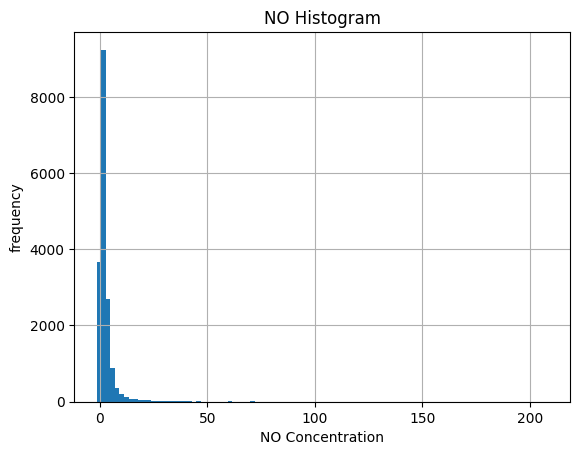

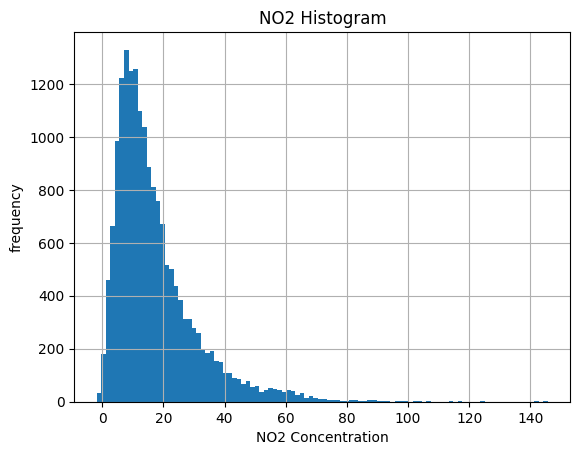

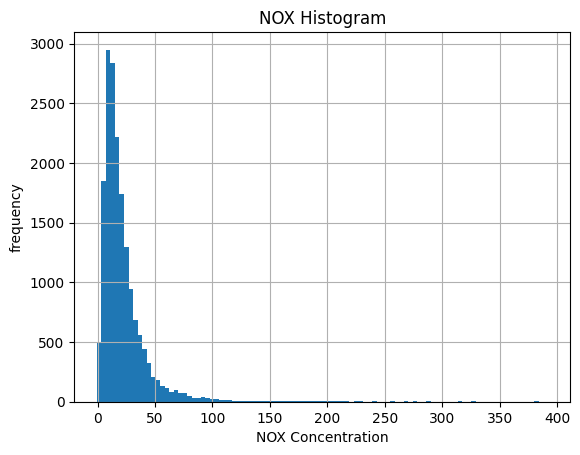

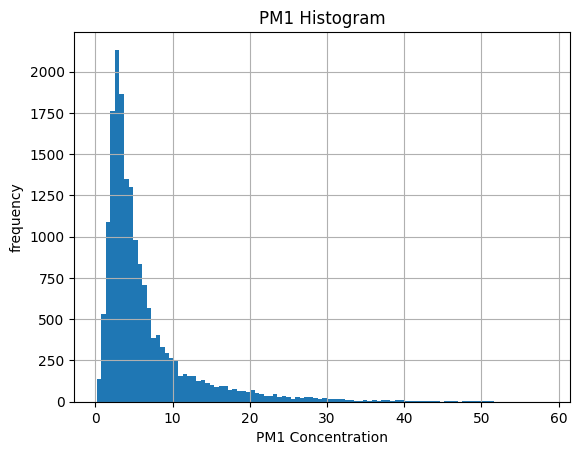

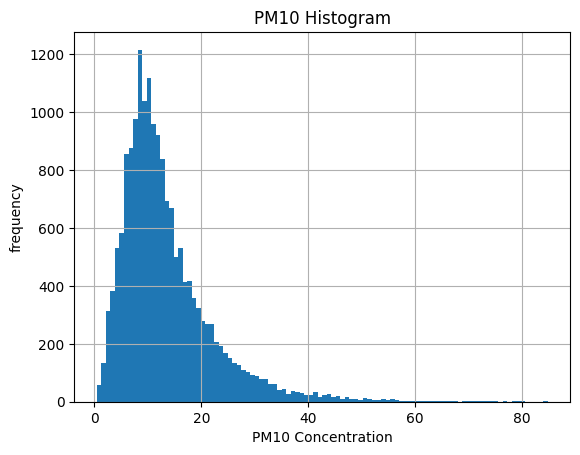

<Figure size 640x480 with 0 Axes>

In [ ]:
columns=["NO","NO2","NOX","PM1","PM10"] #attribuited the species to a list of columns
for column in columns: #created a for loop, which for every column in the list of species a histogram would be plotted
  plt.subplot()
  plt.hist(clean_df[column],bins=100) #decided to do a binning of 100 for each pollutant even if the concentration size was different, because I wanted to see a fair comparison
  plt.xlabel(f"{column} Concentration")
  plt.ylabel("frequency")
  plt.title(f"{column} Histogram")
  plt.grid()
  plt.figure()



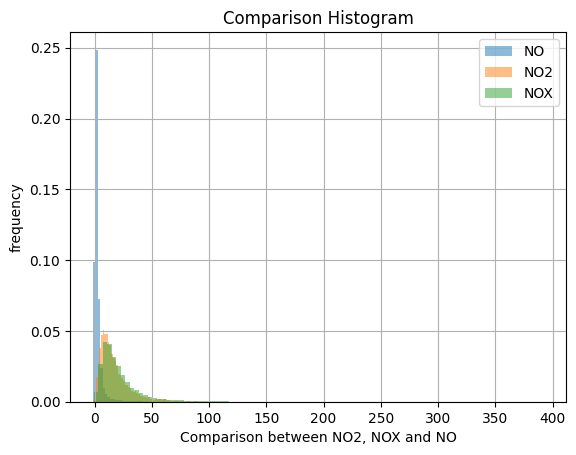

In [ ]:
columns=["NO","NO2","NOX"] #chose the pollutants that shared a similar concentration to identify a correlation

for column in columns:
  plt.hist(clean_df[column],bins=100,density=True,alpha=0.5,label=column)

plt.xlabel("Comparison between NO2, NOX and NO")
plt.ylabel("frequency")
plt.title("Comparison Histogram")
plt.legend()
plt.grid()



 c)ii) Create boxplots of the numerical quantities recorded in the dataset.

<Figure size 640x480 with 0 Axes>

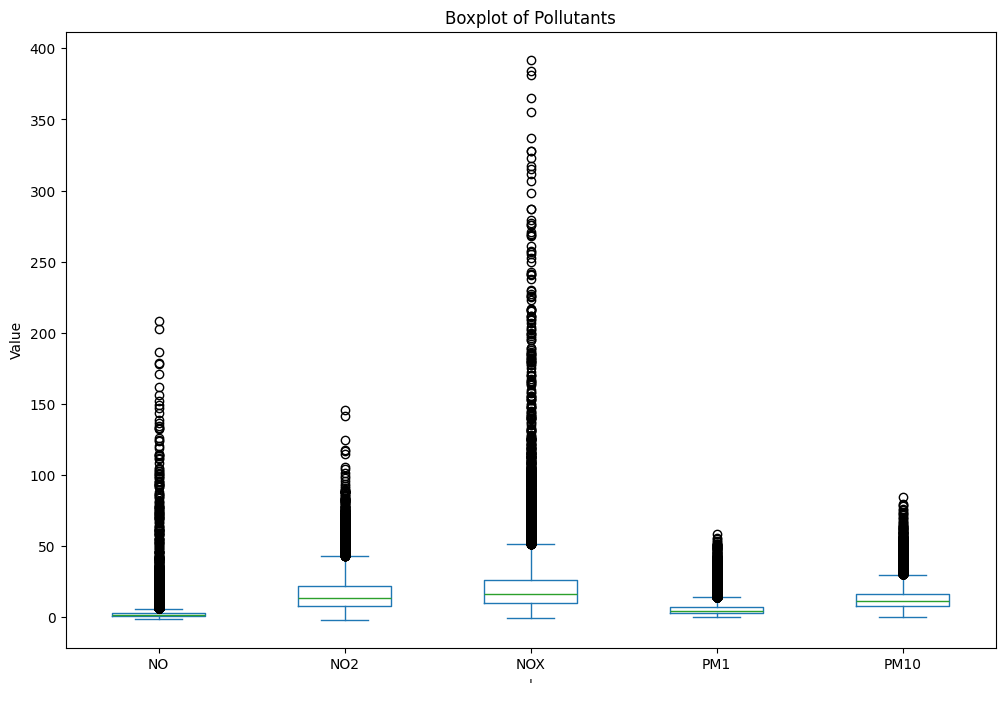

<Figure size 640x480 with 0 Axes>

In [ ]:
columns=["NO","NO2","NOX","PM1","PM10"]

clean_df.plot(kind='box', figsize=(12, 8), grid=True) #plotted a box plot for each pollutant
plt.xlabel("'")
plt.ylabel("Value")
plt.title("Boxplot of Pollutants")
plt.grid()
plt.figure()

c)iii) Calculate and visualise the correlations between the numerical variables with:

-Pearson correlation coefficients

-Scatter plots or heat-maps, commenting on which is the best choice for appreciating the correlations and/or appropriately adjusting axis ranges.

In [ ]:
df_numeric = clean_df.drop(columns=["ReadingDateTime"]) #dropped the ReadingDateTime column so it would not intefere with the pearson correlation calculation
pearson = df_numeric.corr(method="pearson") #computed the Pearson coefficient
pearson

Species,NO,NO2,NOX,PM1,PM10
Species,,,,,
NO,1.000000,0.568987,0.887016,0.406962,0.378095
NO2,0.568987,1.000000,0.884404,0.553332,0.526071
NOX,0.887016,0.884404,1.000000,0.541673,0.509980
PM1,0.406962,0.553332,0.541673,1.000000,0.860960
PM10,0.378095,0.526071,0.509980,0.860960,1.000000


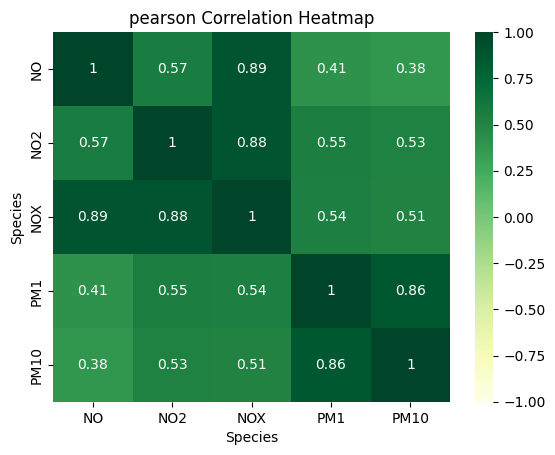

In [ ]:
sns.heatmap(pearson, annot=True, cmap='YlGn', vmin=-1, vmax=1) #initiliazed heatmap based on pearson coefficient, to identify trends
plt.title('pearson Correlation Heatmap')

plt.show()

 c)iv) Split the measurements in years and compare:
 A. Produce an appropriate visualisation to compare the distribution of the
 pollutants in the three years (i.e. 2022 vs 2023 vs 2024).

<ipython-input-95-7de2f6e1c92f>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
<ipython-input-95-7de2f6e1c92f>:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
<ipython-input-95-7de2f6e1c92f>:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


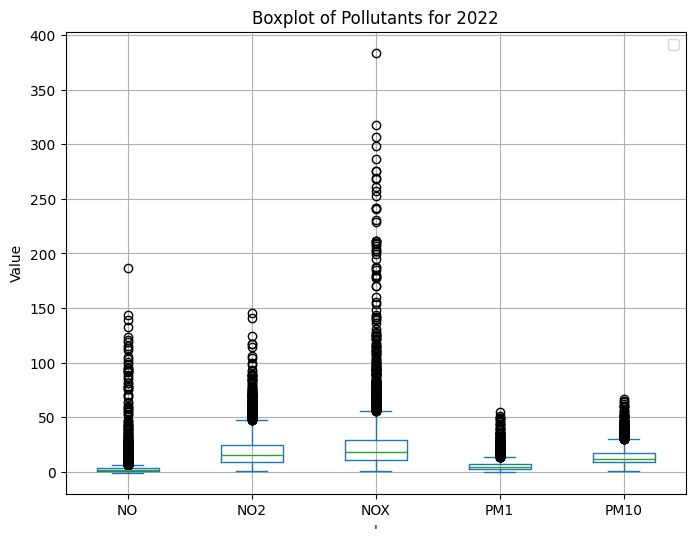

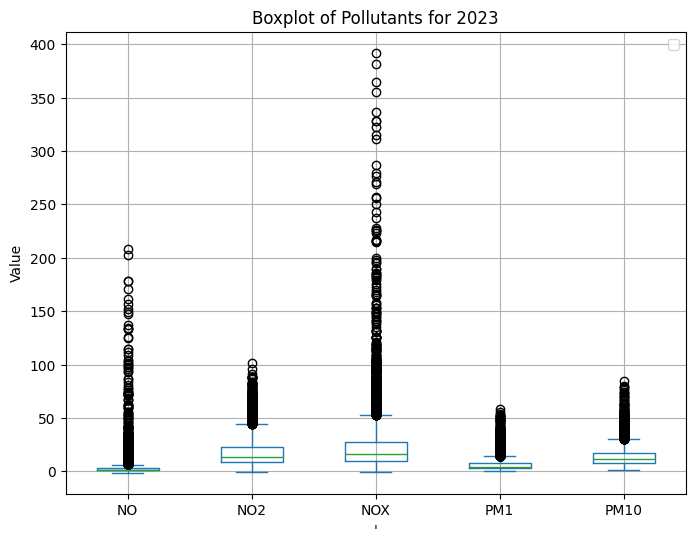

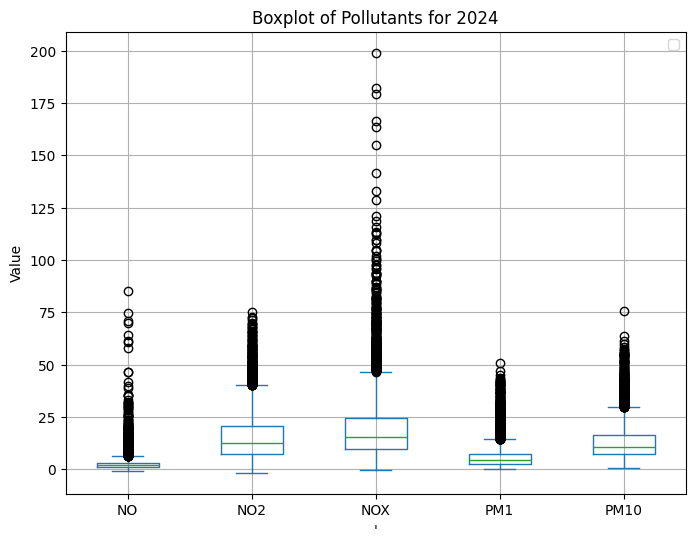

In [ ]:
#split the data set in three part depending on each year, to allow comparison between the years to be drawn
#set the start date and date for each year
df22 = clean_df.loc[(clean_df["ReadingDateTime"] >= "2022-01-01") & (clean_df["ReadingDateTime"] < "2022-12-31")]
df23 = clean_df.loc[(clean_df["ReadingDateTime"] >= "2023-01-01") & (clean_df["ReadingDateTime"] < "2023-12-31")]
df24 = clean_df.loc[(clean_df["ReadingDateTime"] >= "2024-01-01") & (clean_df["ReadingDateTime"] < "2024-12-31")]

#plotted a boxplot for each year
df22.plot(kind='box',figsize=(8,6), grid=True)
plt.xlabel("'")
plt.ylabel("Value")
plt.title("Boxplot of Pollutants for 2022")
plt.legend()

df23.plot(kind='box', figsize=(8,6), grid=True)
plt.xlabel("'")
plt.ylabel("Value")
plt.title("Boxplot of Pollutants for 2023")
plt.legend()

df24.plot(kind='box', figsize=(8,6), grid=True)
plt.xlabel("'")
plt.ylabel("Value")
plt.title("Boxplot of Pollutants for 2024")
plt.legend()




d)Apply A/B testing to two years at the time for the two of the pollutants measured.




**NOX**

d)ii) Compare the difference distribution with the difference of the mean from the two samples

In [ ]:
#grouped the two years together
df22_23 = clean_df[(clean_df["ReadingDateTime"] > "2022-01-01") | (clean_df["ReadingDateTime"] < "2023-12-31")]

mean_22 = df22["NOX"].mean() #calculated the mean for NOX for 2022
mean_23 = df23["NOX"].mean()  #calculated the mean for NOX for 2023
print("Average concentration NOX in 2022:", mean_22)
print("Average concentration NOX in 2023:", mean_23)
print("Concentration difference:", mean_22 - mean_23) #calculated the difference between the two years' means

df22_24=clean_df[
    ((clean_df["ReadingDateTime"]>"2022-01-01") & (clean_df["ReadingDateTime"]<"2022-12-31")) |
    ((clean_df["ReadingDateTime"]>"2024-01-01") & (clean_df["ReadingDateTime"]<"2024-12-31"))]

mean_22 = df22["NOX"].mean()
mean_24 = df24["NOX"].mean()
print("Average concentration NOX in 2022:", mean_22)
print("Average concentration NOX in 2024:", mean_24)
print("Concentration difference:", mean_22 - mean_24)

df23_24 = clean_df[(clean_df["ReadingDateTime"] > "2023-01-01") | (clean_df["ReadingDateTime"] < "2024-12-31")]

mean_23 = df23["NOX"].mean()
mean_24 = df24["NOX"].mean()
print("Average concentration NOX in 2023:", mean_23)
print("Average concentration NOX in 2024:", mean_24)
print("Concentration difference:", mean_23 - mean_24)

Average concentration NOX in 2022: 25.476539512261585
Average concentration NOX in 2023: 23.19832028668856
Concentration difference: 2.278219225573025
Average concentration NOX in 2022: 25.476539512261585
Average concentration NOX in 2024: 19.44255109893704
Concentration difference: 6.033988413324543
Average concentration NOX in 2023: 23.19832028668856
Average concentration NOX in 2024: 19.44255109893704
Concentration difference: 3.7557691877515182


 d)i) Perform a permutation test without replacement: write a function that draw two samples from the overall dataset, each of them with the numbers of
 records in each A and B datasets. Record the mean for each of these samples and then take the difference and save it. Run this function 1000 times, save
 the differences and produce an histogram with these differences.

One permutation test result (NOX mean difference): [0.8843593585848986, 0.28675652201275525, -0.10563719545091743, -0.8938141821683168, -0.6584975560007749, 0.08306272846815688, -0.6336539545656343, 0.7009232804736243, -0.36535872769731625, 0.9716509933576631, 0.8208745405460469, 0.15117331390484878, -0.6277520782007429, -0.891900062582895, 0.03931717967752846, 0.26099571626060936, -0.5222364718294372, 0.7847056913540911, -0.43303073740994336, 0.3086093218142629, -0.2978064100256539, -0.8210378881216407, -0.45998782952097983, 0.004185206904839589, -0.8731975381584967, 0.172388099100246, 0.3845757925727824, -0.5244297412483405, 0.5607541983271389, 1.2679401289401646, -1.3114901445827911, 0.1302775479757443, 0.7872179959902397, -0.8293722863919228, -0.37361338710199377, -0.0358916043726083, 0.8266168753758762, 0.7030766804597235, 0.5384228377242728, 0.9566172064464595, -0.3936717115061512, -0.9639186420070054, 0.53307926900181, -0.3641225479791821, -0.8465594533505225, -0.002992754500663

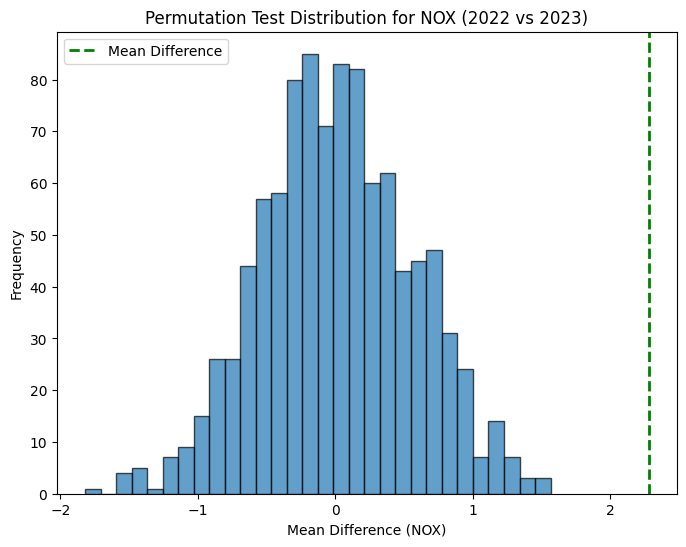

In [ ]:
def perm_fun(x, nA, nB):
    n = nA + nB  #total number of records
    idx_B = set(random.sample(range(n), nB))  #picked a random value from group B
    idx_A = list(set(range(n)) - idx_B)

    return x.loc[list(idx_B)].mean() - x.loc[idx_A].mean()

nA = len(df22)  #length of values of 2022
nB = len(df23)  #length of values of 2023
column = clean_df["NOX"].reset_index(drop=True)


result_22_23 = [perm_fun(column, nA, nB)for _ in range(1000)] #run the fucntion for a 1000 times and for the NOX pollutant
print("One permutation test result (NOX mean difference):", result)

plt.figure(figsize=(8,6))
plt.hist(result_22_23, bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Mean Difference (NOX)")
plt.ylabel("Frequency")
plt.title("Permutation Test Distribution for NOX (2022 vs 2023)")
plt.axvline(x=mean_22-mean_23, color="green", linestyle="dashed", linewidth=2, label="Mean Difference")
plt.legend()
plt.show()

One permutation test result (NOX mean difference): [0.8843593585848986, 0.28675652201275525, -0.10563719545091743, -0.8938141821683168, -0.6584975560007749, 0.08306272846815688, -0.6336539545656343, 0.7009232804736243, -0.36535872769731625, 0.9716509933576631, 0.8208745405460469, 0.15117331390484878, -0.6277520782007429, -0.891900062582895, 0.03931717967752846, 0.26099571626060936, -0.5222364718294372, 0.7847056913540911, -0.43303073740994336, 0.3086093218142629, -0.2978064100256539, -0.8210378881216407, -0.45998782952097983, 0.004185206904839589, -0.8731975381584967, 0.172388099100246, 0.3845757925727824, -0.5244297412483405, 0.5607541983271389, 1.2679401289401646, -1.3114901445827911, 0.1302775479757443, 0.7872179959902397, -0.8293722863919228, -0.37361338710199377, -0.0358916043726083, 0.8266168753758762, 0.7030766804597235, 0.5384228377242728, 0.9566172064464595, -0.3936717115061512, -0.9639186420070054, 0.53307926900181, -0.3641225479791821, -0.8465594533505225, -0.002992754500663

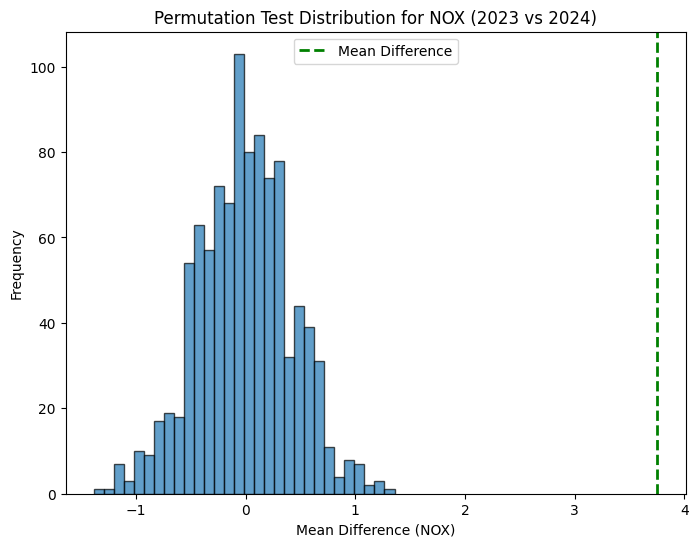

In [ ]:
nA = len(df23)
nB = len(df24)
column = clean_df["NOX"].reset_index(drop=True)

result_23_24 = [perm_fun(column, nA, nB)for _ in range(1000)]
print("One permutation test result (NOX mean difference):", result)

plt.figure(figsize=(8,6))
plt.hist(result_23_24, bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Mean Difference (NOX)")
plt.ylabel("Frequency")
plt.title("Permutation Test Distribution for NOX (2023 vs 2024)")
plt.axvline(x=mean_23-mean_24, color="green", linestyle="dashed", linewidth=2, label="Mean Difference")
plt.legend()
plt.show()

One permutation test result (NOX mean difference): [0.8843593585848986, 0.28675652201275525, -0.10563719545091743, -0.8938141821683168, -0.6584975560007749, 0.08306272846815688, -0.6336539545656343, 0.7009232804736243, -0.36535872769731625, 0.9716509933576631, 0.8208745405460469, 0.15117331390484878, -0.6277520782007429, -0.891900062582895, 0.03931717967752846, 0.26099571626060936, -0.5222364718294372, 0.7847056913540911, -0.43303073740994336, 0.3086093218142629, -0.2978064100256539, -0.8210378881216407, -0.45998782952097983, 0.004185206904839589, -0.8731975381584967, 0.172388099100246, 0.3845757925727824, -0.5244297412483405, 0.5607541983271389, 1.2679401289401646, -1.3114901445827911, 0.1302775479757443, 0.7872179959902397, -0.8293722863919228, -0.37361338710199377, -0.0358916043726083, 0.8266168753758762, 0.7030766804597235, 0.5384228377242728, 0.9566172064464595, -0.3936717115061512, -0.9639186420070054, 0.53307926900181, -0.3641225479791821, -0.8465594533505225, -0.002992754500663

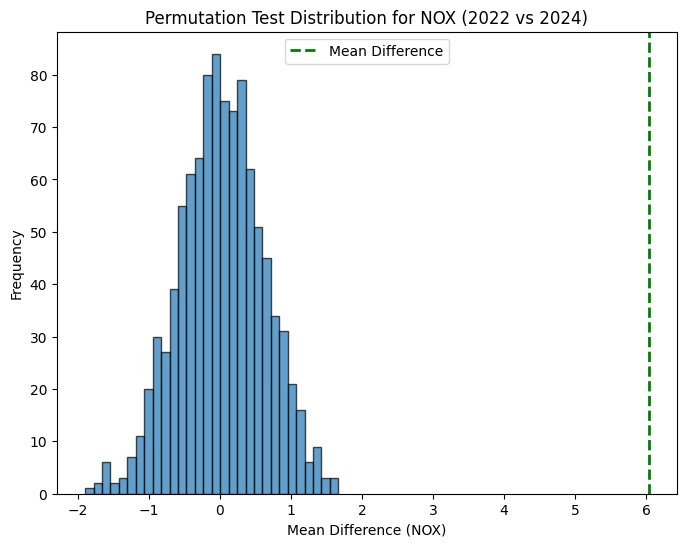

In [ ]:
nA = len(df22)
nB = len(df24)
column = clean_df["NOX"].reset_index(drop=True)

result_22_24 = [perm_fun(column, nA, nB)for _ in range(1000)]
print("One permutation test result (NOX mean difference):", result)

plt.figure(figsize=(8,6))
plt.hist(result_22_24, bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Mean Difference (NOX)")
plt.ylabel("Frequency")
plt.title("Permutation Test Distribution for NOX (2022 vs 2024)")
plt.axvline(x=mean_22-mean_24, color="green", linestyle="dashed", linewidth=2, label="Mean Difference")
plt.legend()
plt.show()

 d)iii) Calculate the p-value: probability of the difference between the samples to
 be due to statistical fluctuation;

In [ ]:
print(np.mean(result_22_23 < mean_22 - mean_23)) #calculated the p value for each
print(np.mean(result_23_24 < mean_23 - mean_24))
print(np.mean(result_22_24 < mean_22 - mean_24))

1.0
1.0
1.0


 d)iv) Compare the results of the permutation tests with the t-test;

In [ ]:
t, p = ttest_ind(df22["NOX"],df23["NOX"]) #through the use of ttest_ind function, computed the t-stastic

print(f"t = {t:.3f}")
print(f"p = {p:.3f}")

#draw conclusion for significance of the p value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

t = 4.225
p = 0.000
Reject the null hypothesis


In [ ]:
t, p = ttest_ind(df23["NOX"],df24["NOX"])

print(f"t = {t:.3f}")
print(f"p = {p:.3f}")

#draw conclusion for significance of the p value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

t = 9.952
p = 0.000
Reject the null hypothesis


In [ ]:
t, p = ttest_ind(df22["NOX"],df24["NOX"])

print(f"t = {t:.3f}")
print(f"p = {p:.3f}")

#draw conclusion for significance of the p value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

t = 13.349
p = 0.000
Reject the null hypothesis


**NO2**

In [ ]:
df22_23 = clean_df[(clean_df["ReadingDateTime"] > "2022-01-01") | (clean_df["ReadingDateTime"] < "2023-12-31")]

mean_22 = df22["NO2"].mean()
mean_23 = df23["NO2"].mean()
print("Average concentration NO2 in 2022:", mean_22)
print("Average concentration NO2 in 2023:", mean_23)
print("Concentration difference:", mean_22 - mean_23)

df22_24=clean_df[
    ((clean_df["ReadingDateTime"]>"2022-01-01") & (clean_df["ReadingDateTime"]<"2022-12-31")) |
    ((clean_df["ReadingDateTime"]>"2024-01-01") & (clean_df["ReadingDateTime"]<"2024-12-31"))]

mean_22 = df22["NO2"].mean()
mean_24 = df24["NO2"].mean()
print("Average concentration NO2 in 2022:", mean_22)
print("Average concentration NO2 in 2024:", mean_24)
print("Concentration difference:", mean_22 - mean_24)

df23_24 = clean_df[(clean_df["ReadingDateTime"] > "2023-01-01") | (clean_df["ReadingDateTime"] < "2024-12-31")]

mean_23 = df23["NO2"].mean()
mean_24 = df24["NO2"].mean()
print("Average concentration NO2 in 2023:", mean_23)
print("Average concentration NO2 in 2024:", mean_24)
print("Concentration difference:", mean_23 - mean_24)

Average concentration NO2 in 2022: 19.313787465940056
Average concentration NO2 in 2023: 17.79004799191715
Concentration difference: 1.523739474022907
Average concentration NO2 in 2022: 19.313787465940056
Average concentration NO2 in 2024: 15.335322976287816
Concentration difference: 3.9784644896522394
Average concentration NO2 in 2023: 17.79004799191715
Average concentration NO2 in 2024: 15.335322976287816
Concentration difference: 2.4547250156293323


One permutation test result (NO2 mean difference): [0.8843593585848986, 0.28675652201275525, -0.10563719545091743, -0.8938141821683168, -0.6584975560007749, 0.08306272846815688, -0.6336539545656343, 0.7009232804736243, -0.36535872769731625, 0.9716509933576631, 0.8208745405460469, 0.15117331390484878, -0.6277520782007429, -0.891900062582895, 0.03931717967752846, 0.26099571626060936, -0.5222364718294372, 0.7847056913540911, -0.43303073740994336, 0.3086093218142629, -0.2978064100256539, -0.8210378881216407, -0.45998782952097983, 0.004185206904839589, -0.8731975381584967, 0.172388099100246, 0.3845757925727824, -0.5244297412483405, 0.5607541983271389, 1.2679401289401646, -1.3114901445827911, 0.1302775479757443, 0.7872179959902397, -0.8293722863919228, -0.37361338710199377, -0.0358916043726083, 0.8266168753758762, 0.7030766804597235, 0.5384228377242728, 0.9566172064464595, -0.3936717115061512, -0.9639186420070054, 0.53307926900181, -0.3641225479791821, -0.8465594533505225, -0.002992754500663

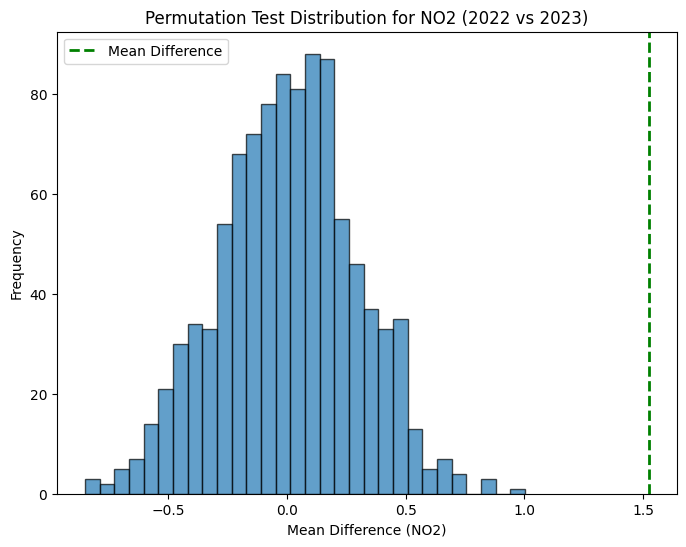

In [ ]:
nA = len(df22)
nB = len(df23)
column = clean_df["NO2"].reset_index(drop=True)


result_22_23 = [perm_fun(column, nA, nB)for _ in range(1000)]
print("One permutation test result (NO2 mean difference):", result)

plt.figure(figsize=(8,6))
plt.hist(result_22_23, bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Mean Difference (NO2)")
plt.ylabel("Frequency")
plt.title("Permutation Test Distribution for NO2 (2022 vs 2023)")
plt.axvline(x=mean_22-mean_23, color="green", linestyle="dashed", linewidth=2, label="Mean Difference")
plt.legend()
plt.show()

One permutation test result (NO2 mean difference): [0.8843593585848986, 0.28675652201275525, -0.10563719545091743, -0.8938141821683168, -0.6584975560007749, 0.08306272846815688, -0.6336539545656343, 0.7009232804736243, -0.36535872769731625, 0.9716509933576631, 0.8208745405460469, 0.15117331390484878, -0.6277520782007429, -0.891900062582895, 0.03931717967752846, 0.26099571626060936, -0.5222364718294372, 0.7847056913540911, -0.43303073740994336, 0.3086093218142629, -0.2978064100256539, -0.8210378881216407, -0.45998782952097983, 0.004185206904839589, -0.8731975381584967, 0.172388099100246, 0.3845757925727824, -0.5244297412483405, 0.5607541983271389, 1.2679401289401646, -1.3114901445827911, 0.1302775479757443, 0.7872179959902397, -0.8293722863919228, -0.37361338710199377, -0.0358916043726083, 0.8266168753758762, 0.7030766804597235, 0.5384228377242728, 0.9566172064464595, -0.3936717115061512, -0.9639186420070054, 0.53307926900181, -0.3641225479791821, -0.8465594533505225, -0.002992754500663

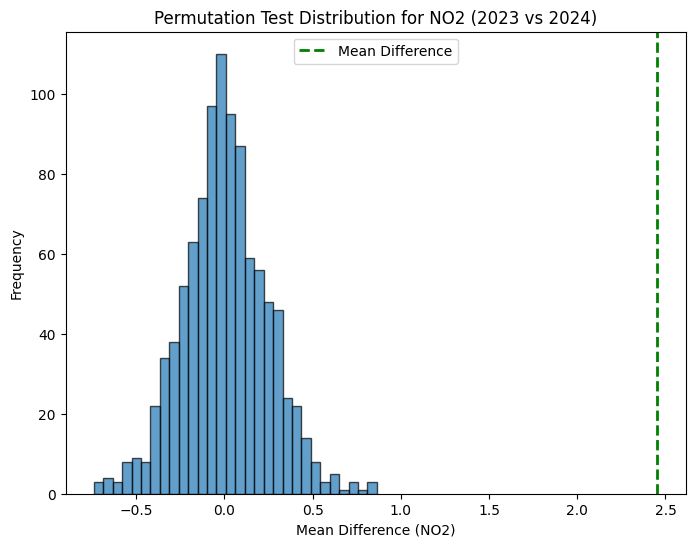

In [ ]:
nA = len(df23)
nB = len(df24)
column = clean_df["NO2"].reset_index(drop=True)

result_23_24 = [perm_fun(column, nA, nB)for _ in range(1000)]
print("One permutation test result (NO2 mean difference):", result)

plt.figure(figsize=(8,6))
plt.hist(result_23_24, bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Mean Difference (NO2)")
plt.ylabel("Frequency")
plt.title("Permutation Test Distribution for NO2 (2023 vs 2024)")
plt.axvline(x=mean_23-mean_24, color="green", linestyle="dashed", linewidth=2, label="Mean Difference")
plt.legend()
plt.show()

One permutation test result (NO2 mean difference): [0.8843593585848986, 0.28675652201275525, -0.10563719545091743, -0.8938141821683168, -0.6584975560007749, 0.08306272846815688, -0.6336539545656343, 0.7009232804736243, -0.36535872769731625, 0.9716509933576631, 0.8208745405460469, 0.15117331390484878, -0.6277520782007429, -0.891900062582895, 0.03931717967752846, 0.26099571626060936, -0.5222364718294372, 0.7847056913540911, -0.43303073740994336, 0.3086093218142629, -0.2978064100256539, -0.8210378881216407, -0.45998782952097983, 0.004185206904839589, -0.8731975381584967, 0.172388099100246, 0.3845757925727824, -0.5244297412483405, 0.5607541983271389, 1.2679401289401646, -1.3114901445827911, 0.1302775479757443, 0.7872179959902397, -0.8293722863919228, -0.37361338710199377, -0.0358916043726083, 0.8266168753758762, 0.7030766804597235, 0.5384228377242728, 0.9566172064464595, -0.3936717115061512, -0.9639186420070054, 0.53307926900181, -0.3641225479791821, -0.8465594533505225, -0.002992754500663

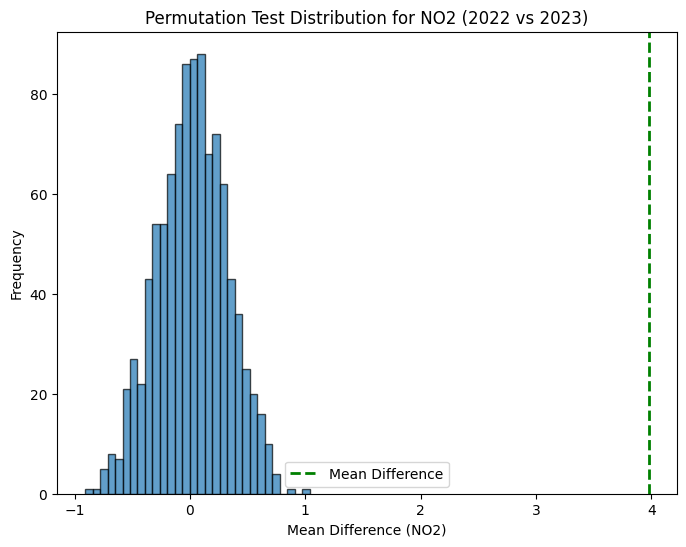

In [ ]:
nA = len(df22)
nB = len(df24)
column = clean_df["NO2"].reset_index(drop=True)

result_22_24 = [perm_fun(column, nA, nB)for _ in range(1000)]
print("One permutation test result (NO2 mean difference):", result)

plt.figure(figsize=(8,6))
plt.hist(result_22_24, bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Mean Difference (NO2)")
plt.ylabel("Frequency")
plt.title("Permutation Test Distribution for NO2 (2022 vs 2023)")
plt.axvline(x=mean_22-mean_24, color="green", linestyle="dashed", linewidth=2, label="Mean Difference")
plt.legend()
plt.show()

In [ ]:
print(np.mean(result_22_23 < mean_22 - mean_23))
print(np.mean(result_23_24 < mean_23 - mean_24))
print(np.mean(result_22_24 < mean_22 - mean_24))

1.0
1.0
1.0


In [ ]:
t, p = ttest_ind(df22["NO2"],df23["NO2"])

print(f"t = {t:.3f}")
print(f"p = {p:.3f}")

#draw conclusion for significance of the p value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

t = 5.356
p = 0.000
Reject the null hypothesis


In [ ]:
t, p = ttest_ind(df22["NO2"],df24["NO2"])

print(f"t = {t:.3f}")
print(f"p = {p:.3f}")

#draw conclusion for significance of the p value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

t = 14.881
p = 0.000
Reject the null hypothesis


In [ ]:
t, p = ttest_ind(df23["NO2"],df24["NO2"])

print(f"t = {t:.3f}")
print(f"p = {p:.3f}")

#draw conclusion for significance of the p value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

t = 11.250
p = 0.000
Reject the null hypothesis
